# Testing

In [1]:
from Lab_Analyses.Utilities import load_mat_files
from Lab_Analyses.Behavior import process_lever_behavior as plb
from Lab_Analyses.Behavior import summarize_lever_behavior as slb

In [2]:
path = r'Z:\People\Jake\Behavior\JW003\211019\JW003_8MW'
fname = 'data_@lever2p_ITIOptoPulsed_JW_JW003_210919a'

behavior_data = plb.process_lever_press_behavior(path, True)

c:\users\jake\desktop\python_code\lab_analyses\Lab_Analyses\Behavior\process_lever_behavior.py:405: ComplexWarning: Casting complex values to real discards the imaginary part
  lever_velocity_envelope = np.sqrt(


In [3]:
summarized_data = slb.summarize_lever_behavior(behavior_data)

7
8
10


In [4]:
summarized_data.movement_matrix

array([[-1.02819585, -1.02818073, -1.02816551, ..., -1.15045179,
        -1.15042017, -1.15038871],
       [-1.08086025, -1.08086092, -1.08086173, ..., -1.40795265,
        -1.40840828, -1.4088594 ],
       [-1.10551809, -1.10549106, -1.10546433, ..., -1.14011554,
        -1.14010992, -1.14010423]])

(-2.5, 0.0)

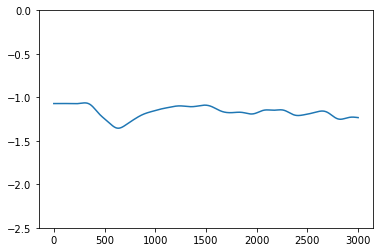

In [15]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(summarized_data.movement_avg)
plt.ylim((-2.5,0))

In [6]:
behavior_data.lever_force_smooth[6:100]

array([-0.58874747, -0.59720786, -0.60564428, -0.61405334, -0.62243166,
       -0.6307759 , -0.63908275, -0.64734892, -0.65557119, -0.66374637,
       -0.67187129, -0.67994287, -0.68795805, -0.69591383, -0.70380728,
       -0.71163552, -0.71939571, -0.7270851 , -0.73470099, -0.74224076,
       -0.74970185, -0.75708177, -0.76437811, -0.77158851, -0.77871073,
       -0.78574257, -0.79268191, -0.79952673, -0.80627508, -0.8129251 ,
       -0.81947499, -0.82592306, -0.83226768, -0.83850734, -0.84464057,
       -0.85066602, -0.85658241, -0.86238855, -0.86808335, -0.87366578,
       -0.87913492, -0.88448992, -0.88973002, -0.89485456, -0.89986293,
       -0.90475465, -0.90952928, -0.9141865 , -0.91872605, -0.92314776,
       -0.92745154, -0.93163738, -0.93570534, -0.93965557, -0.9434883 ,
       -0.94720381, -0.95080248, -0.95428475, -0.95765114, -0.96090224,
       -0.96403868, -0.96706121, -0.96997059, -0.97276767, -0.97545338,
       -0.97802867, -0.98049458, -0.9828522 , -0.98510266, -0.98

In [7]:
a = []
len(a)

0

In [8]:
import numpy as np
a = np.array([1,2,3,4,5,6,7,8,9])
b= [True,False,True,False,True,True,False,False,False]
a[np.nonzero(b)[0]]

array([1, 3, 5, 6])

In [9]:
c = np.nonzero(b)
print(c[0])

[0 2 4 5]


In [10]:
a[np.array(b)]

array([1, 3, 5, 6])

In [11]:
a = [1,2,3,np.nan]

In [12]:
np.min(a)

nan